
**Performing Exploratory Data Analysis on Netflix Userbase Dataset**

The Netflix Userbase Dataset contains attributes associated with an average user of thr streaping platform such as their age, subscription, device used for viewing, country, gender and more.
Exploring this dataset can deliver unique insights into the composition and demographic of netflix users and enable us to identify key parameters of the streaming giants userbase

We start by looking at the data, findind any null values and cleaning the data if required.


In [44]:
#Importing the packages

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import plotly.express as px
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


#Reading in the data
df = pd.read_csv(r'C:\Users\acer\Downloads\Netflix_Userbase.csv')

In [21]:
#Taking a look at the data

df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [23]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000



It is clear that the data in the userbase is consistent, standardised and non-null. Thus, any more cleaning and modelling is not required.

**Analysing the data:**

The key parameters given in the dataset are the age of users, the gender of users, the country they belong to, preffered device for viewing, subscription  type, and date of joining and last payment. 

Using these parameters to build upon, we use seaborn to plot the parameters and explore the demographics and composition of our userbase.


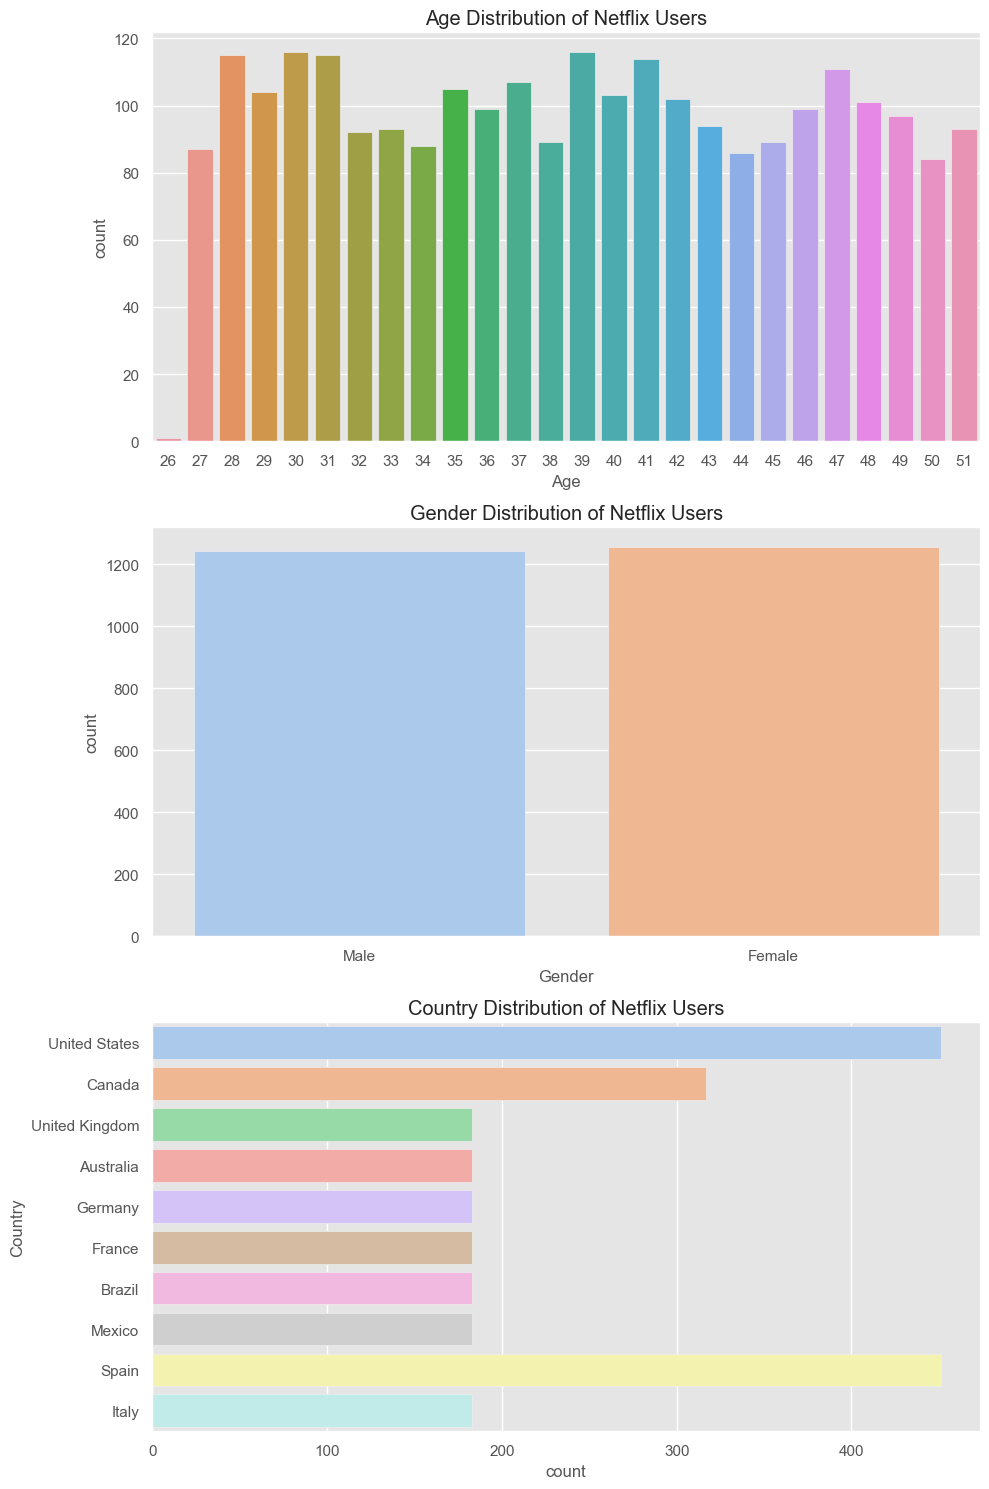

In [61]:
#Analysing the age, gender and country distribution of the userbase
# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# # Plot the age distribution
sns.countplot(x='Age', data=df, ax=axes[0])
axes[0].set_title('Age Distribution of Netflix Users')
plt.xlabel('Age')
plt.ylabel('Count')

# Plot the gender distribution
sns.countplot(data=df, x="Gender", ax=axes[1])
axes[1].set_title('Gender Distribution of Netflix Users')

# Plot the country distribution
sns.countplot(y="Country", data=df, ax=axes[2])
axes[2].set_title('Country Distribution of Netflix Users')

# Adjust the layout
plt.tight_layout()
plt.show()



**Insights from Plots**

**1. Age Distribution:**

The age distribution plot reveals that Netflix has a diverse userbase, with users spanning various age groups.
The peak age groups for users are in the 28-31 and 39-41 age brackets, indicating that Netflix's content appeals to a wide range of age demographics.
This diversity in age suggests that Netflix's content caters to different preferences and interests, contributing to a broad userbase.

**2. Gender Distribution:**

The plot shows an even split between male and female users, indicating that Netflix's content is attractive to both genders.
An equal gender distribution suggests that the platform offers a balanced mix of content that appeals to a broad audience, regardless of gender.

**3. Country Distribution:**

The country distribution plot highlights that the United States has the highest number of subscribers, followed closely by Spain and Canada.
This wide distribution across multiple countries signifies Netflix's global reach and popularity.
It indicates that Netflix's content resonates with users from various regions and cultures, contributing to its worldwide success.

*These insights provide valuable information about the userbase's demographics and geographic distribution, which can be used for strategic decision-making, content creation, and marketing efforts. Understanding the diverse audience and their preferences is essential for Netflix to continue its growth and success in the streaming industry.*


**Geographic Plot**

We want to create a world map to visualise the number of netflix users in each country and total revenue from a country in an interactive and insightful way. For this we use a choropleth map which is a type of thematic map that uses color coding to represent values of a variable across different geographic regions, such as countries, states, or provinces with a suquential color scheme to identify regions with high and low number of users and revenue.


In [56]:
#Grouping data by country and creating chloropleth map for number of users

country_data = df.groupby('Country').agg({'User ID': 'count', 'Monthly Revenue': 'sum'}).reset_index()
chloro1 = px.choropleth(country_data, locations='Country', locationmode='country names',
                     color='User ID', title='Number of Netflix Users by Country',
                     hover_name='Country', color_continuous_scale='Viridis')
chloro1.show()


In [57]:
# Create a choropleth map showing the total revenue from each country

chloro2 = px.choropleth(country_data, locations='Country', locationmode='country names',
                     color='Monthly Revenue', title='Total Netflix Revenue by Country',
                     hover_name='Country', color_continuous_scale='Viridis')
chloro2.show()

**Analysing Device Usage and Subscription Type**


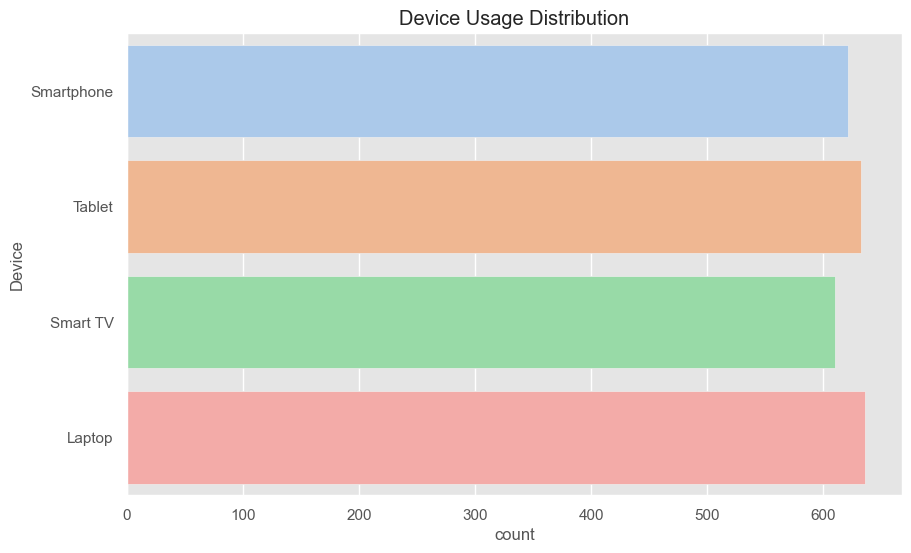

In [62]:
#Analysing the preferred device for viewing by users
# Create a figure for the plot

plt.figure(figsize=(10, 6))

# Plot the device usage distribution

sns.countplot(y="Device", data=df)
plt.title('Device Usage Distribution')
plt.show()


**Device Usage Distribution:**

1. The plot indicates that there is a relatively even distribution of users across different viewing devices, including tablets, laptops, smartphones, and smart TVs.

2. The highest usage is observed for tablet and laptop viewing, followed closely by smartphone and smart TV usage. This suggests that Netflix caters to users who prefer a variety of devices for their viewing experience.

3. The preference for tablets and laptops over smartphones and smart TVs may be due to factors such as screen size and privacy considerations.

*These insights can help Netflix tailor its user experience and content delivery to cater to users on different devices. For example, optimizing the viewing experience for tablets and laptops can be a priority, given their popularity among users.*


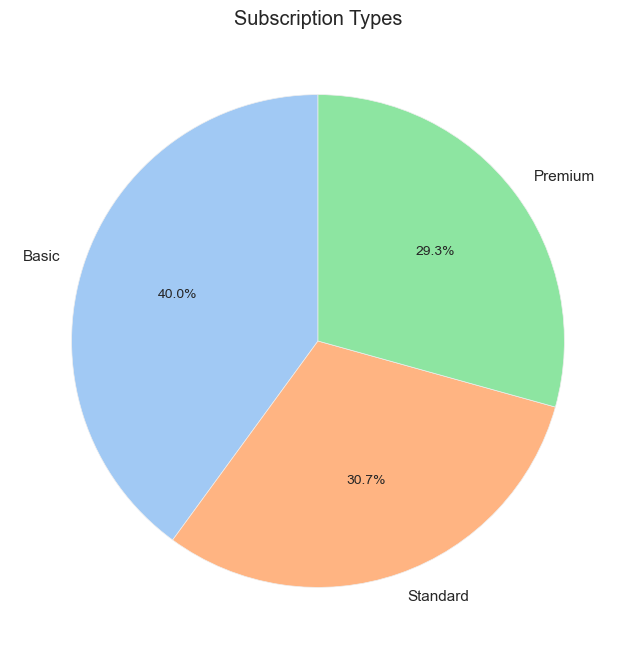

In [55]:
# Plot the subscription type distribution

# Set a pastel color palette
sns.set_palette('pastel')

subscription_counts = df['Subscription Type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Subscription Types')
plt.show()


**Subscription Type Distribution:**

1. The plot indicates that about 40% the users prefer to have the basic subscription of netflix with standard subscription at nearly 31% and premium at only 29%.

2. Netflix's subscription base is diversified among its three primary subscription tiers, indicating that the platform appeals to a wide range of users with varying preferences and budget considerations.

3. The popularity of the basic subscription suggests that there is a demand for a cost-effective Netflix option, even if it comes with some limitations such as single screen access and lower quality video.

4. The substantial representation of the standard and premium tiers reflects Netflix's success in attracting users who seek higher-quality content and the flexibility to watch on multiple devices.

*Netflix may also use this information to tailor its marketing efforts and promotional strategies to different user segments based on their subscription preferences.*



**Netflix Churn Rate**

Churn rate is a crucial business metric that measures the percentage of customers or users who stop using a service or product within a specific period of time. 

In the context of a subscription-based service like **Netflix**, churn rate represents the percentage of subscribers who cancel their subscriptions or do not renew them during a given period. This time period is taken as 1 month or 30 days here as monthly subscription is provided by netflix 

Using date-time to convert the joining and last payment date into datetime objects for calculation. Then the no of days between the two are calculated. If it is greater than 30 it means that the users have continued their subscription for another month. If days active is smaller than 30 it means the user did not continue the subscription. Using this, the mean of users who did not continue subscription gives the churn rate.


In [72]:
# Convert the 'Join Date' and 'Last Payment Date' columns to datetime objects
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')

# Calculate the number of days between the join date and the last payment date
df['Days Active'] = (df['Last Payment Date'] - df['Join Date']).dt.days

# Calculate the churn rate
churn_rate = (df['Days Active'] < 31).mean()

churn_rate = churn_rate*100

print("The Churn Rate Percentage is" ,churn_rate, "%")

The Churn Rate Percentage is 0.16 %



**Churn Rate Analysis**

The churn rate for netflix is found to be **0.16%** which signifies that 0.16% of the subscribers using netflix decided to end their subscription within a month. 

The small churn rate suggests that a very small fraction of subscribers discontinued their Netflix subscriptions during the measured period. It's a relatively low churn rate, which is generally a positive sign for a company as it indicates that the service is retaining the majority of its subscribers.



**Summary**

By performing analysis on the netflix userbase the following insights have been achieved

**1. Demographic Distribution**
                                                                                                                               a. Netflix's user base spans a wide range of age groups.Peak user age groups are 28-31 and 39-41, demonstrating broad appeal  across generations.
                                                                                                                                 b. The distribution of users is relatively even between males and females.Netflix's content appeals to both genders,      suggesting a balanced and inclusive content library.
                                                                                                                                 c. The United States, Spain, and Canada have the highest numbers of subscribers.Netflix enjoys a global reach with users from various countries and regions.
                                                                                                                                                                                                                                                                 **2. Device Usage Distribution:**
                                                                                                                                 a. Users access Netflix on various devices, including tablets, laptops, smartphones, and smart TVs. Tablets and laptops are the preferred devices, possibly due to screen size and privacy considerations. 
                                                                                                                                 b. This diversity in device usage highlights Netflix's adaptability to different viewing preferences.     
                                                                                                                                 **3. Subscription Type Distribution:**

a.Basic subscriptions are the most popular, followed by Standard and Premium.

b. The distribution reflects a broad user base with varying preferences and budget considerations.    

**4. Churn Rate of 0.0016:**

a. A churn rate of 0.0016, equivalent to 0.16%, indicates that a very small fraction of subscribers stopped using Netflix within the measured period.

b. A low churn rate is generally positive, indicating a stable and loyal customer base.

*These insights provide valuable information for Netflix's strategic decision-making, content creation, marketing efforts, and user experience enhancements. Netflix's ability to appeal to a diverse audience, retain subscribers, and adapt to changing viewing habits contributes to its success in the competitive streaming industry.*

                                                                                                                                 
                                                                                                                                 